## Анализ тарифов сервиса аренды самокатов 

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.\
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:\
\
 без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки —  8 рублей;
- стоимость старта (начала поездки) — 50 рублей;\


с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

#### Описание данных:
В основных данных есть информация о пользователях, их поездках и подписках.

##### Пользователи — users_go.csv
- user_id- уникальный идентификатор пользователя
- name- имя пользователя
- age- возраст
- city- город
- subscription_type- тип подписки (free, ultra)

##### Поездки — rides_go.csv
- user_id- уникальный идентификатор пользователя
- distance- расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration- продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date- дата совершения поездки

##### Подписки — subscriptions_go.csv
- subscription_type- тип подписки
- minute_price- стоимость одной минуты поездки по данной подписке
- start_ride_price- стоимость начала поездки
- subscription_fee- стоимость ежемесячного платежа

## Итоговый вывод::
-	Самые часто встречаемые города  в рассмотренных данных Пятигорск и Екатеринбург (более 200 раз). Наименьшая частота встречи у Москвы (около 170 раз)
-	Распределение пользователей с подпиской и без примерно одинаковое, (54% free на 46% ultra)
-	Большая часть пользователей находится в возрастном промежутке от 22 до 28. 
-	Среднее расстояние, которое пользователи преодолевают за одну поездку – находится в промежутке между 2,9км и 3,3км
-	Среднее время поездок пользователей лежит в промежутке между 16 и 19 минутами
-	Пользователи категории ultra пользуются сервисом, преимущественно, для поездок на длительные дистанции (большая часть ездит в среднем 3000 метров и имеет меньшее количество коротких поездок, чем у пользователей с категории free)

Ответы на поставленные вопросы:

Тратят ли пользователи с подпиской больше времени на поездки? -

    - Пользователи с подпиской ultra тратят больше времени на поездки, чем с подпиской free.
    
Действительно ли пользователи с подпиской «выгоднее» для компании? -

    - Не смотря на льготную оплату в ultra, такие пользователи все равно выгоднее, чем пользователи со стандартным тарифом

Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

    - В среднем, пользователи с подпиской ultra за один раз проезжают расстояние больше 3130 метров, что является рекомендованным расстоянием за одну поездку для лучшей износостойкости самоката. Необходимо рассмотреть возможность увеличить рекомендованное расстояние (то есть, повысить износостойкость) или ввести ограничительные меры для пользователей.
    
Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

    - При проверке гипотезы было установлено, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без нее


### Ход исследования:

In [1]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt

#### Шаг 1. Загрузка данных

Читаем отдельно каждый датасет:

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

Выводим на экран первые 5 значений каждой таблицы, для ознакомления с данными внутри нее

In [3]:
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Выводы:
- во всех трех таблицах данные без пропусков 
- типы данных везде корректны 
- таблицы между собой связаны: каждая дополняет друг друга по данным


#### Шаг 2. Предобработка данных

Приводим столб "date" в rides_go в тип datetime:

In [9]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format = '%Y-%m-%d') 

Создаем новый столб, где будет отдельно указан месяц:

In [10]:
rides_go['date_month'] = pd.DatetimeIndex(rides_go['date']).month
rides_go.head()

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверим каждый датафрейм на наличие пропусков. Начнем с users_go:

In [11]:
users_go.info() #проверяем пропущенные значения
users_go.duplicated().sum() #проверяем дубликаты

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


31

In [12]:
users_go = users_go.drop_duplicates()
users_go.duplicated().sum()

0

In [13]:
rides_go.info()
rides_go.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   date_month  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


0

In [14]:
subscriptions_go.info()
subscriptions_go.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


0

В данных пропусков нет, дубликаты удалены

#### Шаг 3. Исследовательский анализ данных
Опишите и визуализируйте общую информацию о пользователях и поездках:

#####  частота встречаемости городов;

Изучим моду каждого значения:

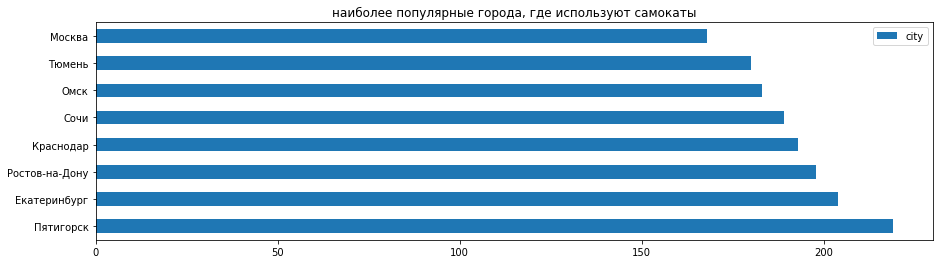

In [15]:
users_go['city'].value_counts().to_frame().plot(kind = 'barh', figsize = (15,4));
plt.title('наиболее популярные города, где используют самокаты');

Самые частовстречаемые города - Пятигорск и Екатегинбург(более 200 раз). Наименьшая частота встречи у  Москвы (около 170 раз)

#####  соотношение пользователей с подпиской и без подписки;

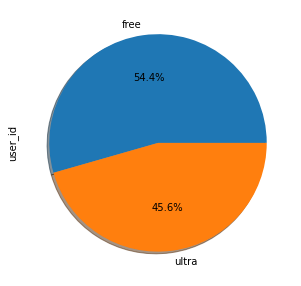

In [16]:
cont = users_go.groupby((['subscription_type'])).count()
cont['user_id'].plot(kind='pie', figsize=(5,5),
                  autopct='%1.1f%%',
                  shadow=True);

Соотношениее пользователей:\
free 54% \
ultra 46% \
Распределение примерно одинаковое, однако пользователей без подписки (free) чуть больше

#####  возраст пользователей;

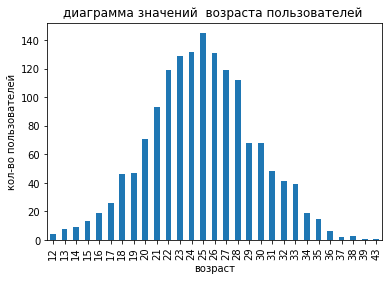

In [17]:
data = users_go.groupby('age').count()
data['user_id'].plot(kind = 'bar');
plt.title('диаграмма значений  возраста пользователей ')
plt.xlabel('возраст')
plt.ylabel('кол-во пользователей');

In [18]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Большая часть пользователей находится в возрастном промежутке от 22 до 28. Наиболее популярный возраст - 25 лет

Посчитаем среднее арифметическое данных, чтобы описать среднюю тенданцию:

##### расстояние, которое пользователь преодолел за одну поездку;

Для того, чтобы узнать, сколько в среднем пользователь проезжает за 1 поездку, мы составляем сводную таблицу, где групируем поездки каждого пользователеля и ищем медиану значений. В дальнейшем, мы ищем медиану всех медиан - это и есть среднее расстояние одной поездки пользователя (мы берем медиану а не ср. арифметическое, дабы исключить выбросы в значениях)

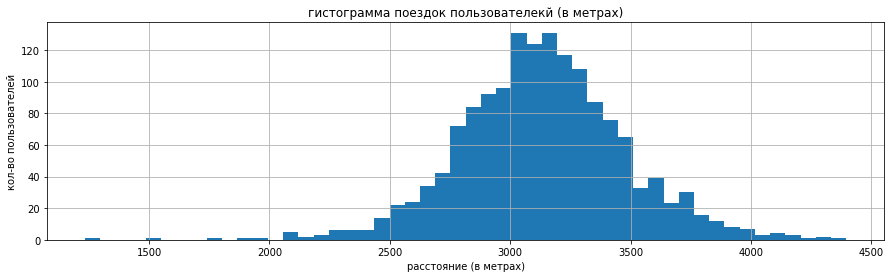

In [19]:
data = rides_go.pivot_table(index = 'user_id', values = 'distance', aggfunc= 'median')
data.hist(bins = 50, figsize = (15, 4))
plt.title('гистограмма поездок пользователекй (в метрах)')
plt.xlabel('расстояние (в метрах)')
plt.ylabel('кол-во пользователей');

In [20]:
data['distance'].describe()

count    1534.000000
mean     3134.108236
std       346.362860
min      1234.763317
25%      2916.315439
50%      3131.071202
75%      3337.730942
max      4395.430303
Name: distance, dtype: float64

Среднее расстояние, которое пользователи преодолели за одну поездку - в промежутке от 2,9км и 3,3км

#####  продолжительность поездок

Производим аналогичные действия с временем поездки пользователей

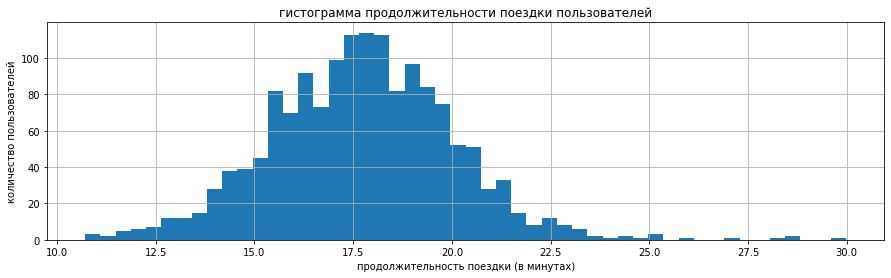

In [21]:
data = rides_go.pivot_table(index = 'user_id', values = 'duration', aggfunc= 'median')
data.hist(bins = 50, figsize = (15, 4))
plt.title('гистограмма продолжительности поездки пользователей')
plt.xlabel('продолжительность поездки (в минутах)')
plt.ylabel('количество пользователей');

In [22]:
data['duration'].describe()

count    1534.000000
mean       17.727225
std         2.322542
min        10.711378
25%        16.189955
50%        17.743728
75%        19.208337
max        29.983174
Name: duration, dtype: float64

Среднее время поездок пользователей лежит в промежутке между 16 и 19 минутами

#### Шаг 4. Объединение данных

##### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

Создадим сводную таблицу в 2 этапа:
  - 1. соединим   users_go и rides_go по user_id
  - 2. присоединим к ним subscriptions_go по subscription_type

In [23]:
data1 = users_go.merge(rides_go, on = 'user_id', how = 'left')
data1['subscription_type'].value_counts()

free     11568
ultra     6500
Name: subscription_type, dtype: int64

In [24]:
data = data1.merge(subscriptions_go, on = 'subscription_type', how = 'outer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   date_month         18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


#####  Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [25]:
data_free = data.loc[data['subscription_type'] == 'free'] #без подписки

In [26]:
data_ultra = data.loc[data['subscription_type'] == 'ultra']# c подпиской

##### 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

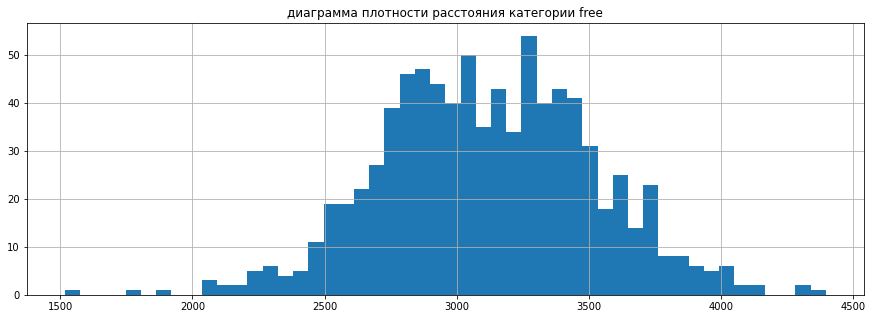

In [27]:
data_free_id = (data_free.pivot_table(index = 'user_id',
                                      values = ['distance'],
                                      aggfunc= 'median')
                .round(2)
                .hist(bins = 50, figsize= (15,5)))
plt.title ('диаграмма плотности расстояния категории free');

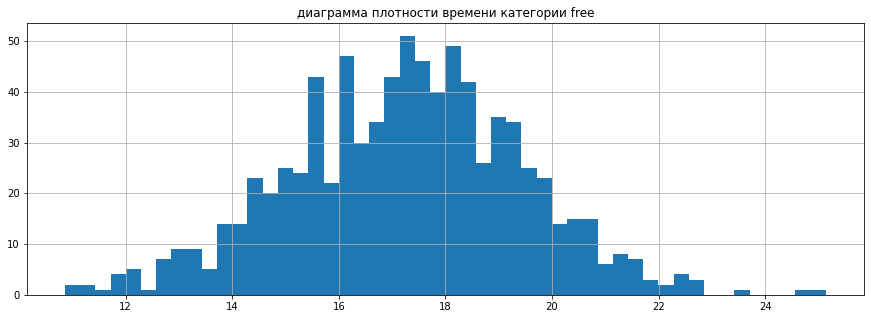

In [28]:
data_free_id =(data_free.pivot_table(index = 'user_id',
                                     values = ['duration'],
                                     aggfunc= 'median')
               .hist(bins=50, figsize= (15,5)))
plt.title ('диаграмма плотности времени категории free');

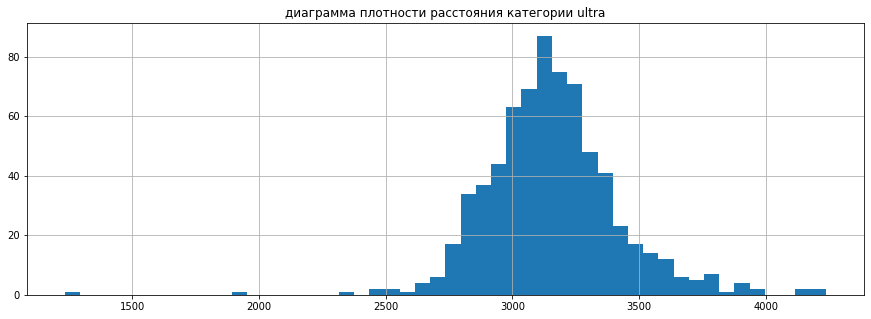

In [29]:
data_ultra_id = (data_ultra.pivot_table(index = 'user_id',
                                        values = ['distance'],
                                        aggfunc= 'median')
                 .round(2)
                 .hist(bins = 50, figsize= (15,5)))
plt.title ('диаграмма плотности расстояния категории ultra');

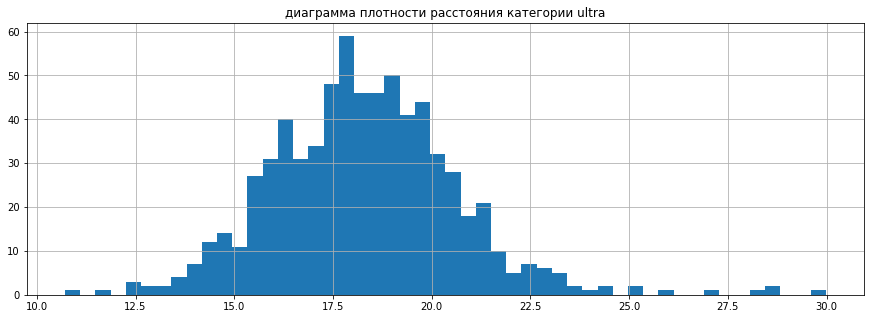

In [30]:
data_ultra_id = (data_ultra.pivot_table(index = 'user_id',
                                        values = ['duration'],
                                        aggfunc= 'median')
                 .round(2)
                 .hist(bins = 50, figsize= (15,5)))
plt.title ('диаграмма плотности расстояния категории ultra');

Выводы:
- Графики категории free "шире" графиков категории ultra.
- пользователи категории ultra пользуются сервисом, преимущестьвенно, для поездок на длительные дистанции (большая плотность в значении чуть выше 3000 метров и имеет меньший разброс, чем у пользователей с категории free)
- время пользователей категории утра немного больше, чем в категории фри (график категории ультра распределен  правее)

#### Шаг 5. Подсчёт выручки

#####  Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [31]:
data_agg =  (data.groupby(['user_id', 'date_month' ])
             .agg(distance_sum=('distance', 'sum'),
                  duration_sum=('duration', 'sum'),
                  duration_count=('duration', 'count')) 
             .reset_index()
             )
data_agg['duration_sum'] =  data_agg['duration_sum'].round().astype('int')
data_agg

,user_id,date_month,distance_sum,duration_sum,duration_count
0,1,1,7027.511294,41,2
1,1,4,754.159807,6,1
2,1,8,6723.470560,45,2
3,1,10,5809.911100,32,2
4,1,11,7003.499363,53,3
...,...,...,...,...,...
11326,1534,6,3409.468534,25,2
11327,1534,8,7622.453034,47,2
11328,1534,9,4928.173852,23,1
11329,1534,11,13350.015305,76,4


#####  В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь — обратитесь к информации об условиях оплаты для подписчиков и и тех, у кого нет подписки. Минуты при подсчёте стоимости округляются до ближайшего целого числа.

Создаем новый df где будет вся необходимая информация для расчета 

In [32]:
datalist = data[['user_id','subscription_type', 'minute_price', 'start_ride_price','subscription_fee', 'date_month']]

dataset = datalist.merge(data_agg, on = ['user_id', 'date_month'], how = 'left')
dataset = dataset.drop_duplicates().reset_index(drop = True)
dataset

,user_id,subscription_type,minute_price,start_ride_price,subscription_fee,date_month,distance_sum,duration_sum,duration_count
0,1,ultra,6,0,199,1,7027.511294,41,2
1,1,ultra,6,0,199,4,754.159807,6,1
2,1,ultra,6,0,199,8,6723.470560,45,2
3,1,ultra,6,0,199,10,5809.911100,32,2
4,1,ultra,6,0,199,11,7003.499363,53,3
...,...,...,...,...,...,...,...,...,...
11326,1534,free,8,50,0,6,3409.468534,25,2
11327,1534,free,8,50,0,8,7622.453034,47,2
11328,1534,free,8,50,0,9,4928.173852,23,1
11329,1534,free,8,50,0,11,13350.015305,76,4


Считаем значения в новом столбце 

In [33]:
dataset['prise_sum'] = ((dataset['start_ride_price'] * dataset['duration_count'])
                        + (dataset['minute_price'] * dataset['duration_sum'])
                        + dataset['subscription_fee']
                       )


создаем вспомогательный датасет, где хранится только необходимая информация для присоединения

In [34]:
dataset1 = dataset[['user_id', 'date_month','subscription_type', 'prise_sum']]

Присоединяем к data_agg

In [35]:
data_agg_vererse = data_agg.merge(dataset1, on = ['user_id', 'date_month'], how = 'left')
data_agg_vererse.head()

,user_id,date_month,distance_sum,duration_sum,duration_count,subscription_type,prise_sum
0,1,1,7027.511294,41,2,ultra,445
1,1,4,754.159807,6,1,ultra,235
2,1,8,6723.470560,45,2,ultra,469
3,1,10,5809.911100,32,2,ultra,391
4,1,11,7003.499363,53,3,ultra,517


#### Шаг 6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то действительно ли пользователи с подпиской «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Разобьем это на две гипотезы:
- Пользователи с подпиской тратят одинаковое время поездки (альт - пользователи тратят больше времени с подпиской)
- пользователи с подпиской приносят столько же выручки, сколько без (альт. - пользователи с подпиской приносят больше выручки, чем без)
 

находим медиану времени пользователей без подписки:

In [36]:
array1 =  data_free['duration'] 
array2 = data_ultra['duration']

In [37]:
alpha = 0.05 #уровень статист. значимости 

results = st.ttest_ind(array2,
                       array1,
                       equal_var = False,
                       alternative ='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута. Пользователи с подпиской тратят больше времени. Теперь проверим вторую гипотезу:

In [38]:
array1 = data_agg_vererse.loc[data_agg_vererse['subscription_type'] == 'free',['prise_sum']] 
array2 = data_agg_vererse.loc[data_agg_vererse['subscription_type'] == 'ultra',['prise_sum']]

In [39]:
results = st.ttest_ind(array2,
                       array1,
                       equal_var = False,
                       alternative ='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: [2.34921862e-47]
Отвергаем нулевую гипотезу


#####  Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Гипотеза: пользователи с подпиской проезжают расстояние в 3130 метров. Альтернативная - пользователи проезжают больше 3130м

создаем срез, где в таблице data_agg_vererse только подписчики ultra

In [40]:
data_agg_vererse_ultra = data_agg_vererse[data_agg_vererse['subscription_type'] == 'ultra']

In [41]:
interested_value = 3130

alpha = 0.05 #уровень статист. значимости 

results = st.ttest_1samp(
          data_agg_vererse_ultra['distance_sum'], 
          interested_value, alternative ='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 3.883541374011314e-278
Отвергаем нулевую гипотезу


Вывод: расстояние, которое проезжают пользователи с подпиской превышает 3130 метров. Необходимо рассмотреть возможности повысить износостойкость самоката

#####  Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Гипотеза:\
    помесячная выручка от пользователей с подпиской выше одинакова с теми, кто без.\
    Альтернативная: помесячная выручка от пользователей с подпиской выше, чем без.\

ранее мы создали срез data_agg_vererse с подписчиками ultra. Создаем аналогичный, но уже с подпиской free. Далее создаем 2 сводные таблицы, где посчитанна сумма пользователей отдельно за каждый месяц

In [42]:
data_agg_vererse_free = data_agg_vererse[data_agg_vererse['subscription_type'] == 'free']

In [43]:
array3 = data_agg_vererse_ultra.pivot_table(index = 'date_month', values = 'prise_sum', aggfunc= 'sum')
array4 = data_agg_vererse_free.pivot_table(index = 'date_month', values = 'prise_sum', aggfunc= 'sum')

In [44]:
alpha = 0.05 #уровень статист. значимости 

results = st.ttest_ind(array4,
                       array3,
                       equal_var = False,
                       alternative ='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: [4.25456339e-13]
Отвергаем нулевую гипотезу


Вывод: пользователи с подпиской приносят больше помесячной выручки, чем пользователи без нее

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

scipy.stats.ttest_rel()